In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('listings.csv')

# 1. Initial Data Overview

In [3]:
df.head() # Peak first few rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,66.0,3,398,2025-01-03,2.05,1,10,31,0363 5F3A 5684 6750 D14D
1,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,NaN,3,294,2025-02-17,1.84,1,88,27,0363 974D 4986 7411 88D8
2,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75.0,2,677,2025-02-28,3.83,2,84,94,0363 607B EA74 0BD8 2F6F
3,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,794,2025-03-02,4.67,2,84,85,0363 607B EA74 0BD8 2F6F
4,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.37168,4.91471,Entire home/apt,NaN,3,42,2022-08-20,0.24,1,0,0,0363 E76E F06A C1DD 172C


In [25]:
df.info() # Data Types and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              10075 non-null  int64   
 1   name                            10075 non-null  object  
 2   host_id                         10075 non-null  int64   
 3   host_name                       10058 non-null  object  
 4   neighbourhood_group             0 non-null      float64 
 5   neighbourhood                   10075 non-null  object  
 6   latitude                        10075 non-null  float64 
 7   longitude                       10075 non-null  float64 
 8   room_type                       10075 non-null  object  
 9   price                           5911 non-null   float64 
 10  minimum_nights                  10075 non-null  int64   
 11  number_of_reviews               10075 non-null  int64   
 12  last_review       

In [4]:
df.shape # Check rows and columns

(10075, 18)

In [5]:
df.describe() # Summery stats for numeric feature

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.007500e+04,1.007500e+04,0.0,10075.000000,10075.000000,5911.000000,10075.00000,10075.000000,8944.000000,10075.000000,10075.000000,10075.000000
mean,5.207374e+17,1.279838e+08,NaN,52.366567,4.889464,265.115716,4.06273,45.924367,0.958245,1.823424,85.035533,8.986104
std,5.197561e+17,1.700389e+08,NaN,0.017197,0.035186,422.193489,16.97802,123.729390,2.140657,3.109970,113.593050,24.413266
min,2.818000e+03,3.159000e+03,NaN,52.290276,4.755870,10.000000,1.00000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.388150e+07,1.244407e+07,NaN,52.355675,4.864737,145.000000,2.00000,3.000000,0.210000,1.000000,0.000000,0.000000
50%,6.280988e+17,4.393610e+07,NaN,52.365530,4.887330,209.000000,3.00000,9.000000,0.410000,1.000000,22.000000,2.000000
75%,1.012134e+18,1.792536e+08,NaN,52.376427,4.908503,300.000000,4.00000,31.000000,0.820000,1.000000,149.000000,6.000000
max,1.367367e+18,6.815058e+08,NaN,52.425120,5.026669,14404.000000,1001.00000,4558.000000,101.590000,36.000000,365.000000,839.000000


# 2. Missing Value Detection

In [6]:
df.isnull().sum() # Count missing values per column

id                                    0
name                                  0
host_id                               0
host_name                            17
neighbourhood_group               10075
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4164
minimum_nights                        0
number_of_reviews                     0
last_review                        1131
reviews_per_month                  1131
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                             127
dtype: int64

<Axes: >

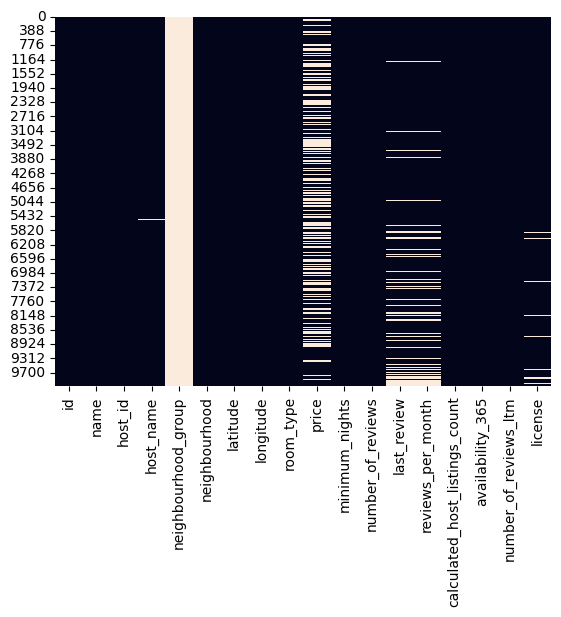

In [7]:
sns.heatmap(df.isnull(), cbar=False)  # Visualize missing data

# 3. Missing Value Handling

In [8]:
# Drop rows and columns with missing critical Values
df.dropna(subset=['price'], inplace=True)
df.drop(columns=['neighbourhood_group'], inplace=True)

In [31]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_bucket,estimated_occupancy
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,66.0,3,398,2025-01-03,2.05,1,10,31,0363 5F3A 5684 6750 D14D,51-100,3980.000000
2,28871,Comfortable double room,124245,Edwin,Centrum-West,52.36775,4.89092,Private room,75.0,2,677,2025-02-28,3.83,2,84,94,0363 607B EA74 0BD8 2F6F,51-100,805.952381
3,29051,Comfortable single room,124245,Edwin,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,794,2025-03-02,4.67,2,84,85,0363 607B EA74 0BD8 2F6F,51-100,945.238095
6,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP,Centrum-West,52.38028,4.89089,Entire home/apt,259.0,3,578,2025-02-11,3.31,1,197,57,0363 576A D827 5085 6B83,201-300,293.401015
7,50263,Cent Adam de Lux 2 bedrooms (4p) apt 125 sqm,230246,Donald,Centrum-Oost,52.37118,4.93146,Entire home/apt,404.0,3,166,2024-08-18,0.95,1,349,7,0363 7F3D 0BAE 28C8 C7D2,401-500,47.564470


In [9]:
df.reset_index(drop=True,inplace=True) # Reset the index after deleting rows.

In [33]:
df.head() # Checking the dataframe again

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_bucket,estimated_occupancy
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,66.0,3,398,2025-01-03,2.05,1,10,31,0363 5F3A 5684 6750 D14D,51-100,3980.000000
1,28871,Comfortable double room,124245,Edwin,Centrum-West,52.36775,4.89092,Private room,75.0,2,677,2025-02-28,3.83,2,84,94,0363 607B EA74 0BD8 2F6F,51-100,805.952381
2,29051,Comfortable single room,124245,Edwin,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,794,2025-03-02,4.67,2,84,85,0363 607B EA74 0BD8 2F6F,51-100,945.238095
3,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP,Centrum-West,52.38028,4.89089,Entire home/apt,259.0,3,578,2025-02-11,3.31,1,197,57,0363 576A D827 5085 6B83,201-300,293.401015
4,50263,Cent Adam de Lux 2 bedrooms (4p) apt 125 sqm,230246,Donald,Centrum-Oost,52.37118,4.93146,Entire home/apt,404.0,3,166,2024-08-18,0.95,1,349,7,0363 7F3D 0BAE 28C8 C7D2,401-500,47.564470


# DataType Corrections

In [10]:
# Convert date columns to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

Text(0.5, 1.0, 'Room Type Distribution')

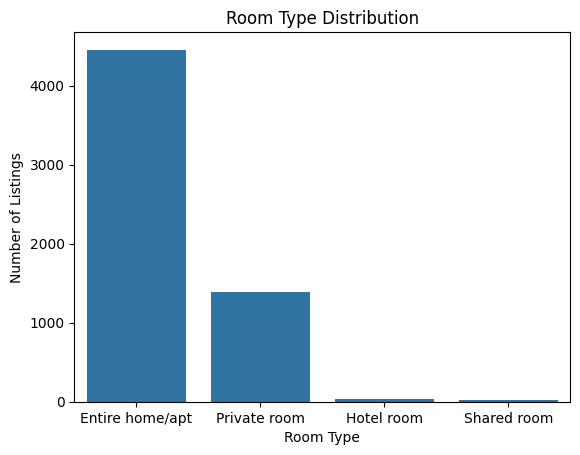

In [11]:
# Room type distribution
sns.countplot(data=df,x="room_type",order=df["room_type"].value_counts().index)
plt.xlabel("Room Type")
plt.ylabel("Number of Listings") 
plt.title("Room Type Distribution")

Text(0.5, 1.0, 'Price Distribution')

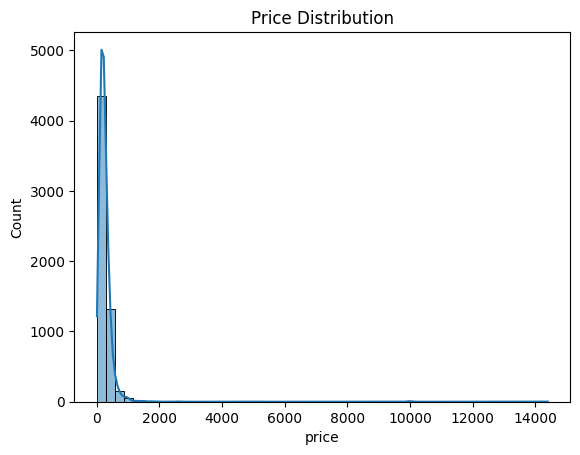

In [12]:
#Price distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")

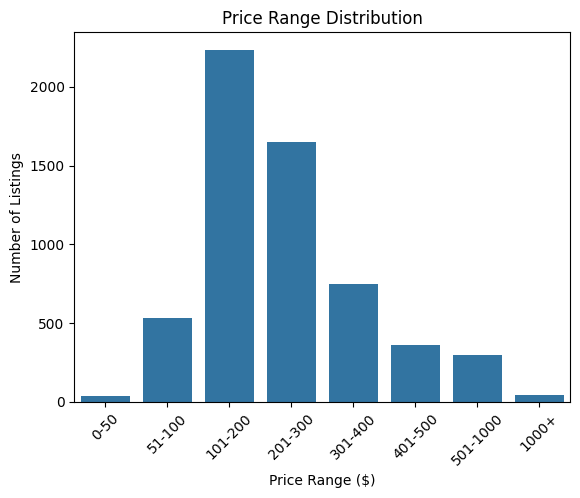

In [14]:
#price range distribution
price_bins=[0,50,100,200,300,400,500,1000,np.inf]
price_labels=['0-50','51-100','101-200','201-300','301-400','401-500','501-1000','1000+']
df['price_bucket']=pd.cut(df['price'],bins=price_bins, labels=price_labels)
sns.countplot(data=df, x='price_bucket', order=price_labels)
plt.xlabel("Price Range ($)")
plt.ylabel("Number of Listings")
plt.title("Price Range Distribution")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Price Distribution by Neighbourhoods')

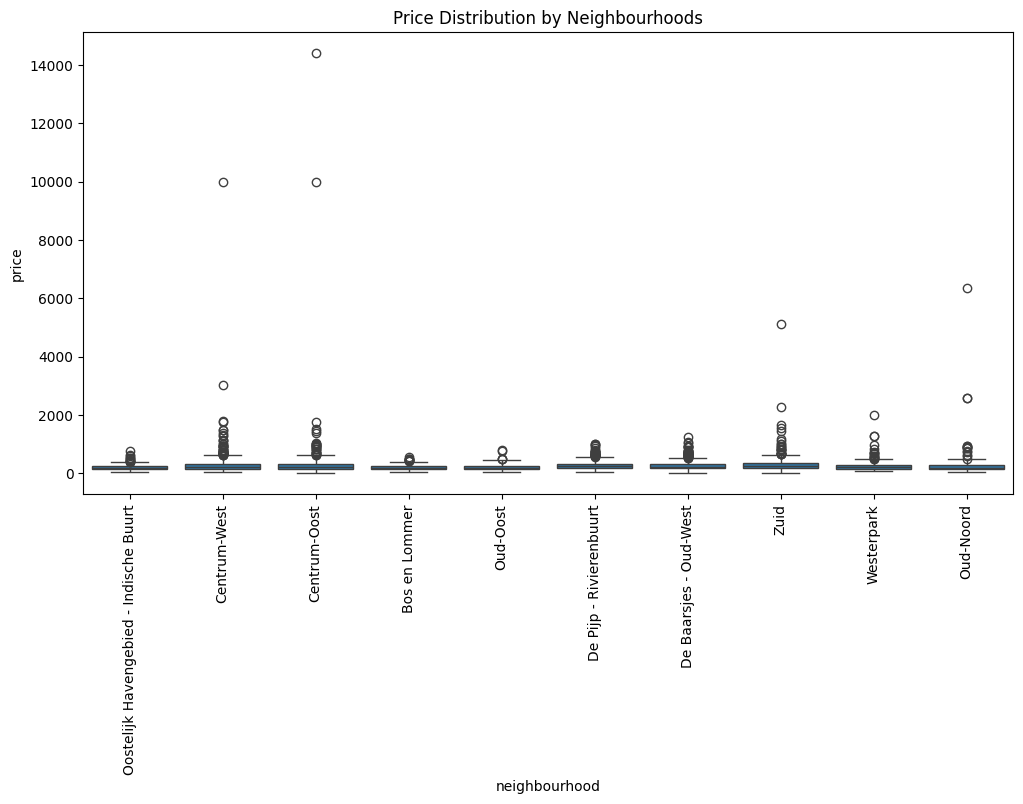

In [13]:
#price by neighbourhood
plt.figure(figsize=(12, 6))
top_neigh=df['neighbourhood'].value_counts().head(10).index
sns.boxplot(data=df[df['neighbourhood'].isin(top_neigh)], x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Neighbourhoods")

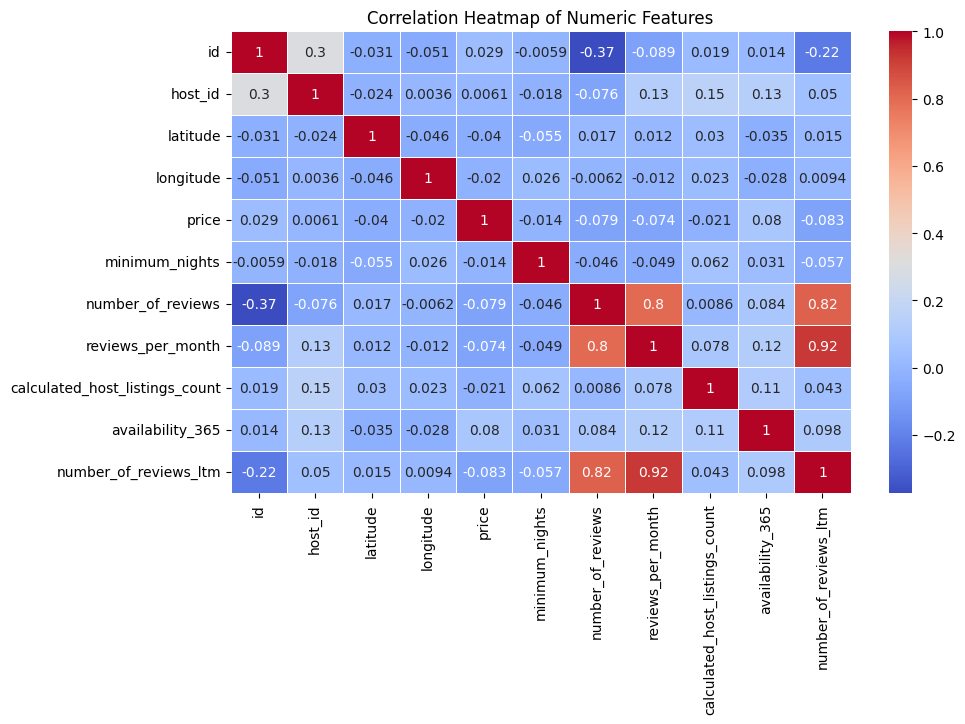

In [15]:
#Correlation heatmap
numeric_df=df.select_dtypes(include="number")
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [16]:
#Top hosts and their occupancy
df['estimated_occupancy']=((df['number_of_reviews']/df['availability_365'])*100).fillna(0)
df['estimated_occupancy'] = df['estimated_occupancy'].replace([np.inf, -np.inf], 0)
df['estimated_occupancy'] = df['estimated_occupancy'].astype(int)

host_occupancy=df.groupby(['host_id','host_name'])['estimated_occupancy'].mean().reset_index()
host_occupancy = host_occupancy.sort_values(by='estimated_occupancy', ascending=False)
host_occupancy=host_occupancy.astype({'estimated_occupancy': int})
total_occupancy= host_occupancy['estimated_occupancy'].sum()
host_occupancy['occupancy_percentage'] = (host_occupancy['estimated_occupancy'] / total_occupancy) * 100
top_hosts = host_occupancy.head(10)


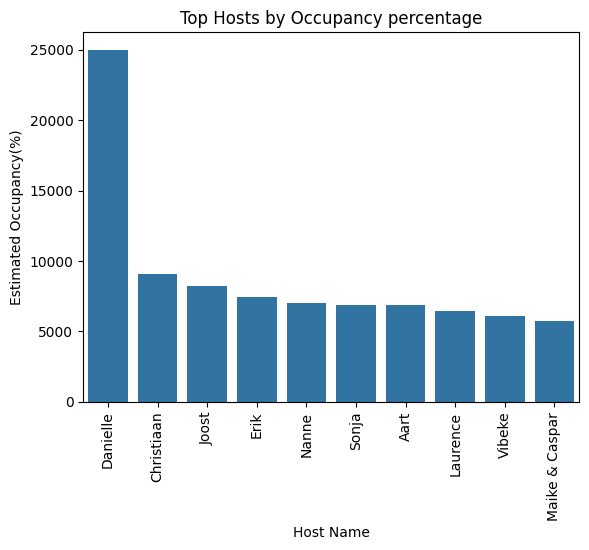

In [17]:
# Visualize Top Hosts and Their Occupancy
sns.barplot(data=top_hosts, x=top_hosts['host_name'], y=top_hosts['estimated_occupancy'])
plt.title('Top Hosts by Occupancy percentage')
plt.xticks(rotation=90)
plt.xlabel('Host Name')
plt.ylabel('Estimated Occupancy(%)')
plt.show()

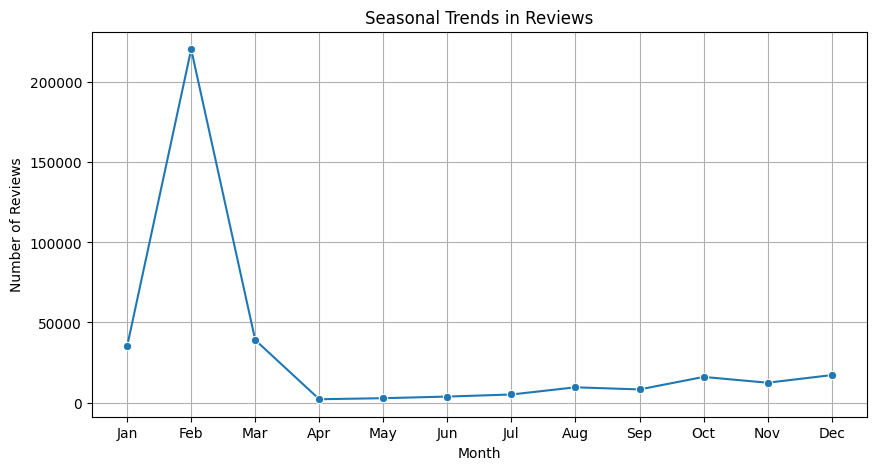

In [18]:
# Seasonal Trends in Reviews
df['review_month'] = df['last_review'].dt.month
month_reviews= df.groupby('review_month')['number_of_reviews'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=month_reviews, x='review_month', y='number_of_reviews', marker='o')
plt.title('Seasonal Trends in Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## 🔍 Key Insights

- Most listings fall under a specific room type (likely "Entire home/apt" or "Private room"), indicating user preference.
- Prices are highly skewed, majority of listings are below $200.
- There are a few outliers with extremely high prices.
- Listings are mostly concentrated in the $0–100 and $101–200 ranges.
- Listings significantly drop in higher price ranges, suggesting budget travel is more common.
- Top 10 neighborhoods show varied price distributions.
- Some neighborhoods consistently charge higher prices, useful for strategic pricing.
- Hosts with consistently high estimated occupancy were identified.
- Correlation heatmap reveals relationships among numeric features.
- Moderate positive correlation might exist between variables like reviews and occupancy.
- February shows a massive spike in the number of reviews, exceeding 220,000 reviews.This could indicate a seasonal event, promotion, or anomaly (possibly data skew or batch update)